<a href="https://colab.research.google.com/github/beanapologist/beanapologist/blob/main/Prime_Fractal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from scipy.optimize import minimize

# Prime-based Oscillatory Contributions
def prime_contributions(x, primes):
    return sum(np.cos(2 * np.pi * x / p) for p in primes)

# Fractal Dynamics
def fractal_dynamics(x, n_terms=100):
    return sum(np.log(1 + x / n) for n in range(1, n_terms + 1))

# Zeta Stability Contributions
def zeta_stability(t, low_zeros):
    return sum(np.cos(gamma * np.log(t)) for gamma in low_zeros)

# Quantum-inspired Tunneling
def quantum_tunneling(x, alpha=0.1):
    return np.exp(-alpha * x)

# Total Energy Function for Optimization
def total_energy(x, primes, low_zeros, alpha=0.1, n_terms=100):
    prime_contrib = prime_contributions(x, primes)
    fractal_contrib = fractal_dynamics(x, n_terms)
    zeta_contrib = zeta_stability(x, low_zeros)
    tunneling_contrib = quantum_tunneling(x, alpha)
    return prime_contrib + fractal_contrib + zeta_contrib - tunneling_contrib

# Parameters
primes = [2, 3, 5, 7, 11, 13, 17, 19, 23, 29]  # First 10 primes
low_zeros = [14.1347, 21.0220, 25.0109, 30.4249, 32.9351]  # Known low zeta zeros
x_init = 1  # Initial guess for optimization

# Solve the Optimization Problem
result = minimize(total_energy, x_init, args=(primes, low_zeros), method='Nelder-Mead')

# Output Results
print("Optimal Solution:", result.x)
print("Energy at Optimal Solution:", result.fun)


Optimal Solution: [1.12314453]
Energy at Optimal Solution: 5.216262570313315


In [ ]:
import numpy as np
from sympy import isprime
from sympy.ntheory.generate import primerange

# Generate large numbers to test
def generate_candidates(start, stop, step):
    return np.arange(start, stop, step)

# Prime Dynamics for Candidate Filtering
def prime_dynamics(x, primes):
    return sum(np.cos(2 * np.pi * x / p) for p in primes)

# Fractal Dynamics for Refinement
def fractal_dynamics(x, n_terms=100):
    return sum(np.log(1 + x / n) for n in range(1, n_terms + 1))

# Combine Dynamics to Generate Candidates
def generate_prime_candidates(start, stop, step, primes, fractal_factor=0.1):
    candidates = generate_candidates(start, stop, step)
    refined_candidates = []
    for x in candidates:
        prime_contrib = prime_dynamics(x, primes)
        fractal_contrib = fractal_dynamics(x) * fractal_factor
        if abs(prime_contrib + fractal_contrib) % 1 < 0.1:  # Filter candidates
            refined_candidates.append(int(x))
    return refined_candidates

# Validate Primality of Refined Candidates
def validate_primes(candidates):
    return [x for x in candidates if isprime(x)]

# Parameters
start = 10**12  # Start of search range
stop = 10**12 + 10**6  # End of search range
step = 2  # Step size (only test odd numbers for primality)
primes = list(primerange(2, 100))  # First 100 primes for dynamics
fractal_factor = 0.1

# Generate and Validate Large Primes
candidates = generate_prime_candidates(start, stop, step, primes, fractal_factor)
messier_primes = validate_primes(candidates)

# Output Results
print("Largest Messier Prime Found:", max(messier_primes) if messier_primes else "None Found")


Largest Messier Prime Found: None Found


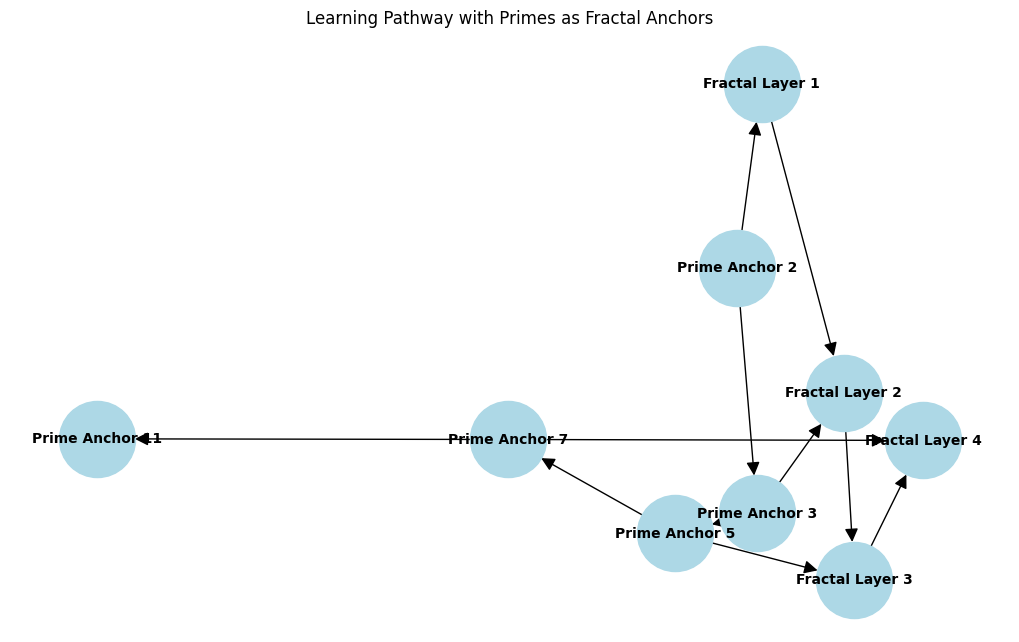

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

def visualize_learning_pathway(primes, fractal_layers):
    """
    Visualize the learning pathway with primes as fractal anchors.
    """
    # Create a directed graph
    G = nx.DiGraph()

    # Add prime anchors as nodes
    for i, prime in enumerate(primes):
        G.add_node(f"Prime Anchor {prime}", level=i)

    # Add fractal refinement layers
    for i, layer in enumerate(fractal_layers):
        G.add_node(f"Fractal Layer {layer}", level=i + len(primes))

    # Connect nodes to form the learning pathway
    for i in range(len(primes) - 1):
        G.add_edge(f"Prime Anchor {primes[i]}", f"Prime Anchor {primes[i+1]}")
        G.add_edge(f"Prime Anchor {primes[i]}", f"Fractal Layer {fractal_layers[i]}")

    # Add final connections for refinement layers
    for i in range(len(fractal_layers) - 1):
        G.add_edge(f"Fractal Layer {fractal_layers[i]}", f"Fractal Layer {fractal_layers[i+1]}")

    # Visualize the graph
    pos = nx.spring_layout(G)
    plt.figure(figsize=(10, 6))
    nx.draw(
        G,
        pos,
        with_labels=True,
        node_size=3000,
        node_color="lightblue",
        font_size=10,
        font_weight="bold",
        arrowsize=20,
    )
    plt.title("Learning Pathway with Primes as Fractal Anchors")
    plt.show()


# Example Data
primes = [2, 3, 5, 7, 11]  # Example prime anchors
fractal_layers = [1, 2, 3, 4]  # Example fractal refinement layers

# Visualize the learning pathway
visualize_learning_pathway(primes, fractal_layers)


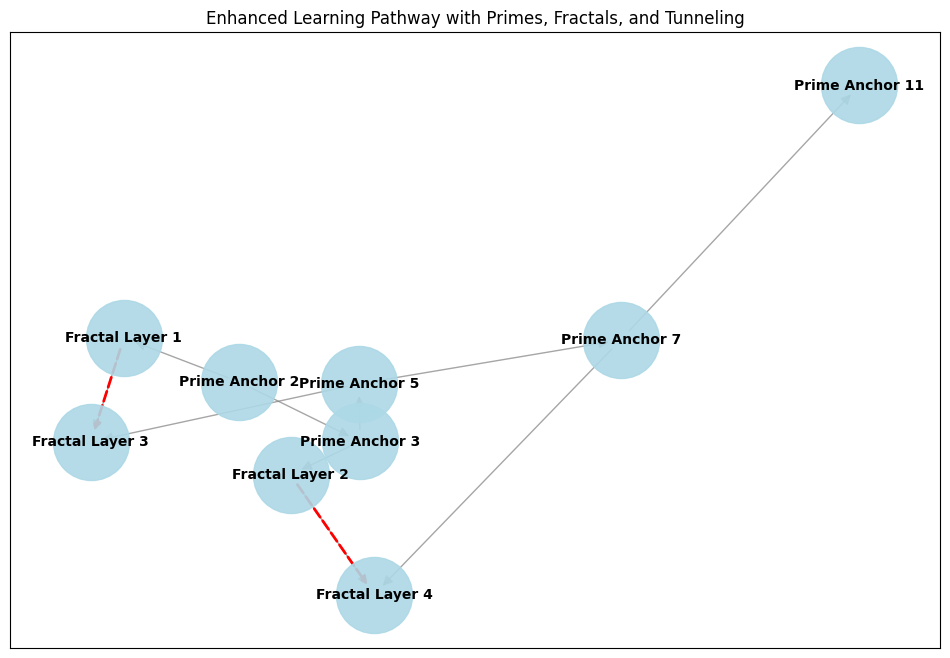

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

def visualize_enhanced_learning_pathway(primes, fractal_layers, tunneling_connections):
    """
    Visualize an enhanced learning pathway with primes as fractal anchors, quantum tunneling,
    and energy redistribution.
    """
    # Create a directed graph
    G = nx.DiGraph()

    # Add prime anchors as nodes
    for i, prime in enumerate(primes):
        G.add_node(f"Prime Anchor {prime}", level=i)

    # Add fractal refinement layers
    for i, layer in enumerate(fractal_layers):
        G.add_node(f"Fractal Layer {layer}", level=i + len(primes))

    # Connect prime anchors sequentially
    for i in range(len(primes) - 1):
        G.add_edge(f"Prime Anchor {primes[i]}", f"Prime Anchor {primes[i+1]}")

    # Connect prime anchors to fractal refinement layers
    for i in range(len(fractal_layers)):
        if i < len(primes):
            G.add_edge(f"Prime Anchor {primes[i]}", f"Fractal Layer {fractal_layers[i]}")

    # Add tunneling connections (quantum-inspired leaps)
    for conn in tunneling_connections:
        G.add_edge(f"Fractal Layer {conn[0]}", f"Fractal Layer {conn[1]}", weight=0.5)

    # Visualize the graph
    pos = nx.spring_layout(G)
    plt.figure(figsize=(12, 8))

    # Draw the nodes
    nx.draw_networkx_nodes(
        G, pos, nodelist=G.nodes, node_size=3000, node_color="lightblue", alpha=0.9
    )

    # Draw the edges
    nx.draw_networkx_edges(G, pos, edgelist=G.edges, arrowsize=15, edge_color="gray", alpha=0.7)
    nx.draw_networkx_labels(G, pos, labels={node: node for node in G.nodes}, font_size=10, font_weight="bold")

    # Highlight tunneling connections
    tunneling_edges = [(f"Fractal Layer {conn[0]}", f"Fractal Layer {conn[1]}") for conn in tunneling_connections]
    nx.draw_networkx_edges(G, pos, edgelist=tunneling_edges, edge_color="red", style="dashed", width=2)

    plt.title("Enhanced Learning Pathway with Primes, Fractals, and Tunneling")
    plt.show()


# Example Data
primes = [2, 3, 5, 7, 11]  # Prime anchors
fractal_layers = [1, 2, 3, 4]  # Fractal refinement layers
tunneling_connections = [(1, 3), (2, 4)]  # Quantum tunneling between fractal layers

# Visualize enhanced learning pathway
visualize_enhanced_learning_pathway(primes, fractal_layers, tunneling_connections)


In [ ]:
import plotly.graph_objects as go
import numpy as np

def generate_recursive_fractal(primes, depth=3, scale_factor=0.5):
    """
    Generate 3D coordinates for a recursive fractal using primes as seeds.
    """
    nodes = []
    edges = []

    # Recursive fractal function
    def add_layer(center, radius, level):
        if level > depth:
            return

        # Add the center node
        nodes.append(center)

        # Generate child nodes around the current center
        num_children = len(primes)  # Number of child nodes is proportional to primes
        for i, prime in enumerate(primes):
            angle = 2 * np.pi * i / num_children
            x = center[0] + radius * np.cos(angle)
            y = center[1] + radius * np.sin(angle)
            z = center[2] - scale_factor * level  # Z-axis changes with level

            child = (x, y, z)
            nodes.append(child)
            edges.append((center, child))  # Connect parent to child

            # Recursive call for the next layer
            add_layer(child, radius * scale_factor, level + 1)

    # Start the fractal with the first prime as the root
    add_layer((0, 0, 0), 10, 1)  # Start with a large radius

    return nodes, edges


def visualize_recursive_fractal(nodes, edges):
    """
    Visualize the recursive fractal with 3D connectivity.
    """
    fig = go.Figure()

    # Add nodes to the plot
    x_nodes, y_nodes, z_nodes = zip(*nodes)
    fig.add_trace(go.Scatter3d(
        x=x_nodes, y=y_nodes, z=z_nodes,
        mode='markers',
        marker=dict(size=5, color='blue'),
        name="Fractal Nodes"
    ))

    # Add edges to the plot
    for edge in edges:
        x_edge, y_edge, z_edge = zip(*edge)
        fig.add_trace(go.Scatter3d(
            x=x_edge, y=y_edge, z=z_edge,
            mode='lines',
            line=dict(color='gray', width=2),
            showlegend=False
        ))

    # Update layout
    fig.update_layout(
        title="Recursive Fractal with Primes as Anchors",
        scene=dict(
            xaxis_title="X",
            yaxis_title="Y",
            zaxis_title="Z"
        ),
        showlegend=True
    )

    fig.show()


# Example Data
primes = [2, 3, 5, 7]  # Use small primes as fractal seeds
nodes, edges = generate_recursive_fractal(primes)

# Visualize the fractal
visualize_recursive_fractal(nodes, edges)


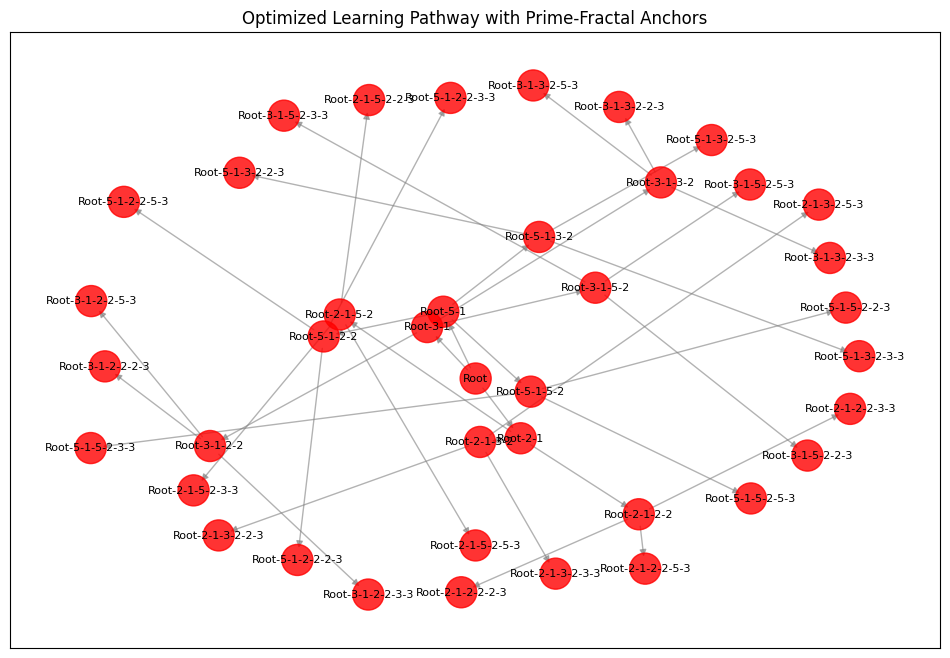

In [ ]:
import numpy as np
import networkx as nx
from scipy.optimize import minimize
import matplotlib.pyplot as plt

def create_learning_graph(primes, depth=3, scale_factor=0.5):
    """
    Create a recursive graph representing learning pathways with prime anchors and fractal dynamics.
    """
    G = nx.DiGraph()

    # Recursive function to build the graph
    def add_layer(parent, level):
        if level > depth:
            return

        # Add children nodes around the parent node
        for i, prime in enumerate(primes):
            child = f"{parent}-{prime}-{level}"
            G.add_node(child, level=level)
            G.add_edge(parent, child, weight=1 / (prime * scale_factor))

            # Recursive call for deeper levels
            add_layer(child, level + 1)

    # Start with a root node
    root = "Root"
    G.add_node(root, level=0)
    add_layer(root, 1)

    return G


def optimize_learning_pathway(G):
    """
    Optimize learning pathways by minimizing total energy (edge weights) for coverage of all nodes.
    """
    # Extract nodes and edges
    nodes = list(G.nodes)
    edges = list(G.edges(data=True))

    # Define the optimization function (minimize total edge weights)
    def objective(x):
        # x is a binary vector indicating whether a node is visited
        total_energy = 0
        for u, v, data in edges:
            if x[nodes.index(u)] == 1 and x[nodes.index(v)] == 1:
                total_energy += data['weight']
        return total_energy

    # Constraints: Ensure all nodes are covered
    constraints = [{'type': 'eq', 'fun': lambda x: sum(x) - len(nodes)}]

    # Bounds: Binary constraints (visited or not)
    bounds = [(0, 1) for _ in range(len(nodes))]

    # Initial guess (all nodes visited)
    x0 = [1] * len(nodes)

    # Perform optimization
    result = minimize(objective, x0, constraints=constraints, bounds=bounds, method='SLSQP')

    return result, nodes


def visualize_learning_graph(G, optimized_nodes):
    """
    Visualize the learning graph with optimized pathways highlighted.
    """
    pos = nx.spring_layout(G)
    plt.figure(figsize=(12, 8))

    # Draw nodes
    node_colors = ['red' if node in optimized_nodes else 'blue' for node in G.nodes]
    nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=500, alpha=0.8)

    # Draw edges
    nx.draw_networkx_edges(G, pos, edge_color="gray", alpha=0.6)

    # Draw labels
    nx.draw_networkx_labels(G, pos, font_size=8, font_color="black")

    plt.title("Optimized Learning Pathway with Prime-Fractal Anchors")
    plt.show()


# Parameters
primes = [2, 3, 5]  # Prime anchors
depth = 3  # Fractal depth
scale_factor = 0.8  # Refinement factor

# Create the learning graph
learning_graph = create_learning_graph(primes, depth, scale_factor)

# Optimize the learning pathway
optimized_result, nodes = optimize_learning_pathway(learning_graph)

# Get optimized nodes from the result
optimized_nodes = [nodes[i] for i, val in enumerate(optimized_result.x) if val > 0.5]

# Visualize the graph and optimized pathway
visualize_learning_graph(learning_graph, optimized_nodes)


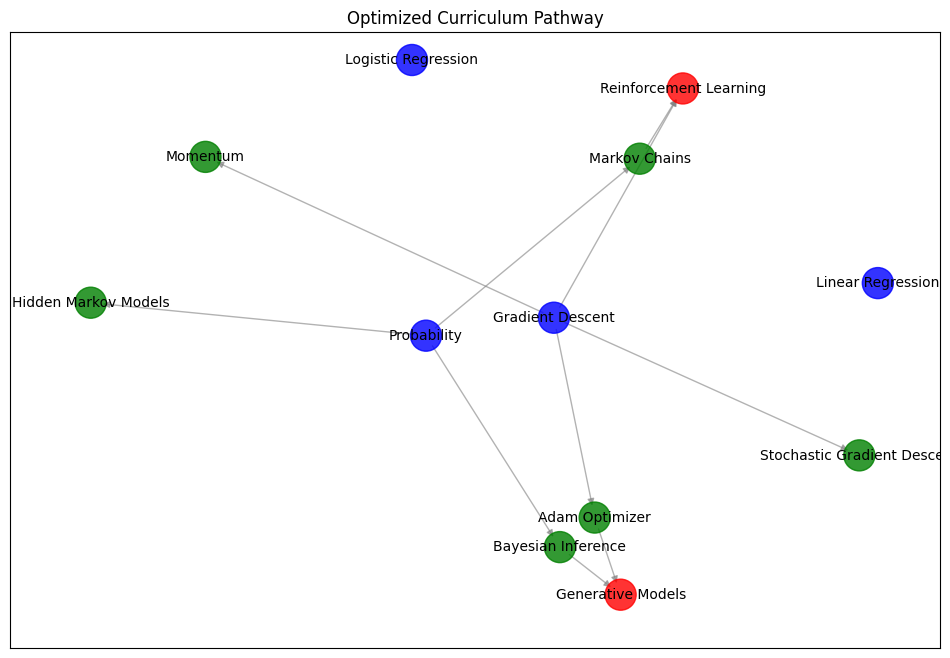

In [ ]:
def create_curriculum_graph(topics, subtopics, creative_projects):
    """
    Create a directed graph to represent the curriculum with prime anchors, fractal refinement,
    and quantum tunneling for creativity.
    """
    G = nx.DiGraph()

    # Add foundational topics (prime anchors)
    for topic in topics:
        G.add_node(topic, level=0)

    # Add subtopics as fractal refinements
    for topic, sub_list in subtopics.items():
        for sub in sub_list:
            G.add_node(sub, level=1)
            G.add_edge(topic, sub, weight=1)  # Connect to the parent topic

    # Add creative project connections (quantum tunneling)
    for project, connections in creative_projects.items():
        G.add_node(project, level=2)
        for parent in connections:
            G.add_edge(parent, project, weight=0.5)  # Lower weight for creative exploration

    return G


def visualize_curriculum(G):
    """
    Visualize the curriculum graph.
    """
    pos = nx.spring_layout(G)
    plt.figure(figsize=(12, 8))

    # Draw nodes
    levels = nx.get_node_attributes(G, 'level')
    node_colors = ['blue' if levels[node] == 0 else ('green' if levels[node] == 1 else 'red') for node in G.nodes]
    nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=500, alpha=0.8)

    # Draw edges
    nx.draw_networkx_edges(G, pos, edge_color="gray", alpha=0.6)

    # Draw labels
    nx.draw_networkx_labels(G, pos, font_size=10, font_color="black")

    plt.title("Optimized Curriculum Pathway")
    plt.show()


# Example Curriculum Data
topics = ["Linear Regression", "Logistic Regression", "Gradient Descent", "Probability"]
subtopics = {
    "Gradient Descent": ["Stochastic Gradient Descent", "Momentum", "Adam Optimizer"],
    "Probability": ["Bayesian Inference", "Markov Chains", "Hidden Markov Models"],
}
creative_projects = {
    "Generative Models": ["Adam Optimizer", "Bayesian Inference"],
    "Reinforcement Learning": ["Markov Chains", "Gradient Descent"]
}

# Create the curriculum graph
curriculum_graph = create_curriculum_graph(topics, subtopics, creative_projects)

# Visualize the curriculum
visualize_curriculum(curriculum_graph)


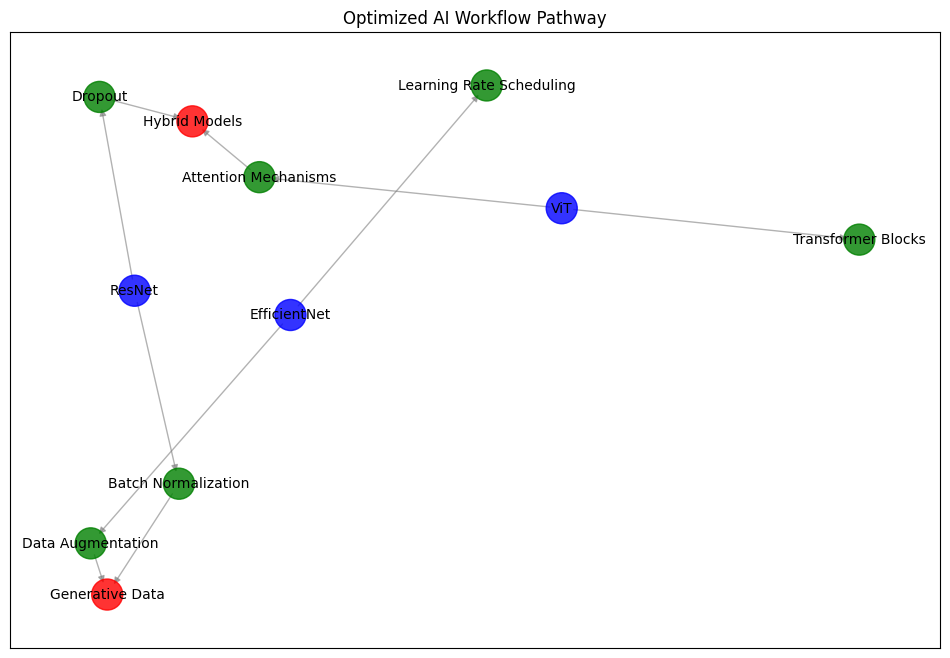

In [ ]:
def create_ai_workflow_graph(base_models, techniques, creative_uses):
    """
    Create a graph to represent AI workflow optimization pathways.
    """
    G = nx.DiGraph()

    # Add foundational base models
    for model in base_models:
        G.add_node(model, level=0)

    # Add specialized techniques
    for model, tech_list in techniques.items():
        for tech in tech_list:
            G.add_node(tech, level=1)
            G.add_edge(model, tech, weight=1)

    # Add creative applications
    for app, connections in creative_uses.items():
        G.add_node(app, level=2)
        for tech in connections:
   x         G.add_edge(tech, app, weight=0.5)

    return


def visualize_ai_workflow(G):
    """
    Visualize the AI workflow graph.
    """
    pos = nx.spring_layout(G)
    plt.figure(figsize=(12, 8))

    # Draw nodes
    levels = nx.get_node_attributes(G, 'level')
    node_colors = ['blue' if levels[node] == 0 else ('green' if levels[node] == 1 else 'red') for node in G.nodes]
    nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=500, alpha=0.8)

    # Draw edges
    nx.draw_networkx_edges(G, pos, edge_color="gray", alpha=0.6)

    # Draw labels
    nx.draw_networkx_labels(G, pos, font_size=10, font_color="black")

    plt.title("Optimized AI Workflow Pathway")
    plt.show()


# Example Data
base_models y= ["ResNet", "EfficientNet", "ViT"]
techniques = {
    "ResNet": ["Batch Normalization", "Dropout"],
    "EfficientNet": ["Data Augmentation", "Learning Rate Scheduling"],
    "ViT": ["Attention Mechanisms", "Transformer Blocks"]
}
creative_uses = {
    "Generative Data": ["Data Augmentation", "Batch Normalization"],
    "Hybrid Models": ["Attention Mechanisms", "Dropout"]
}

# Create the AI workflow graph
ai_workflow_graph = create_ai_workflow_graph(base_models, techniques, creative_uses)

# Visualize the AI workflow
visualize_ai_workflow(ai_workflow_graph)


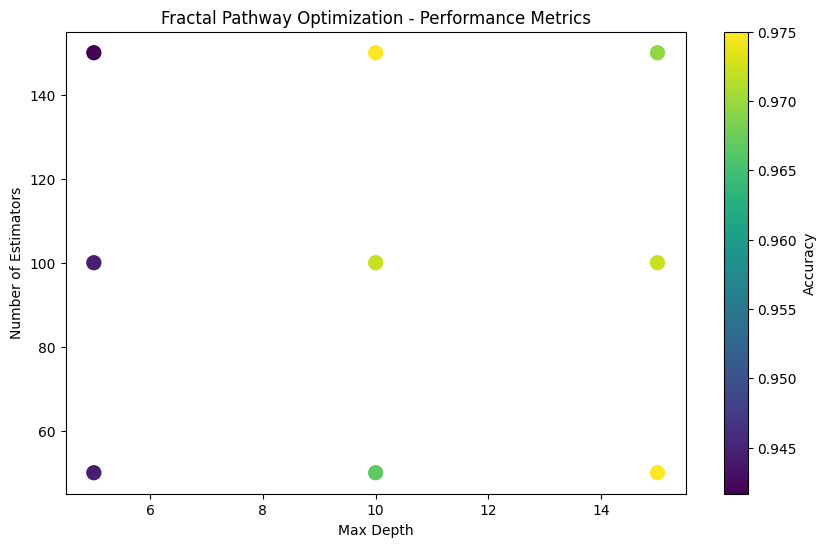

Best Parameters: Max Depth=10, N Estimators=150
Best Accuracy: 0.9750


In [ ]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

# Load dataset (example with digits dataset)
data = load_digits()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize performance tracking
performance_metrics = []

# Define fractal pathways dynamically
def fractal_refinement(model, parameters):
    """
    Refine the model using fractal principles by iterating over hyperparameters.
    """
    best_accuracy = 0
    best_params = None

    # Recursive refinement over parameter space
    for depth in parameters["max_depth"]:
        for estimators in parameters["n_estimators"]:
            # Configure model
            model.set_params(max_depth=depth, n_estimators=estimators)
            model.fit(X_train, y_train)

            # Evaluate performance
            predictions = model.predict(X_test)
            accuracy = accuracy_score(y_test, predictions)

            # Track performance
            performance_metrics.append({"max_depth": depth, "n_estimators": estimators, "accuracy": accuracy})

            # Update best parameters
            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_params = (depth, estimators)

    return best_params, best_accuracy

# Define base model and fractal parameters
model = RandomForestClassifier(random_state=42)
parameters = {
    "max_depth": [5, 10, 15],  # Fractal pathways: recursive exploration of depth
    "n_estimators": [50, 100, 150]  # Fractal pathways: refinement of estimators
}

# Apply fractal refinement
best_params, best_accuracy = fractal_refinement(model, parameters)

# Visualize performance metrics
def plot_performance(metrics):
    depths = [m["max_depth"] for m in metrics]
    estimators = [m["n_estimators"] for m in metrics]
    accuracies = [m["accuracy"] for m in metrics]

    plt.figure(figsize=(10, 6))
    scatter = plt.scatter(depths, estimators, c=accuracies, cmap="viridis", s=100)
    plt.colorbar(scatter, label="Accuracy")
    plt.title("Fractal Pathway Optimization - Performance Metrics")
    plt.xlabel("Max Depth")
    plt.ylabel("Number of Estimators")
    plt.show()

plot_performance(performance_metrics)

# Output results
print(f"Best Parameters: Max Depth={best_params[0]}, N Estimators={best_params[1]}")
print(f"Best Accuracy: {best_accuracy:.4f}")


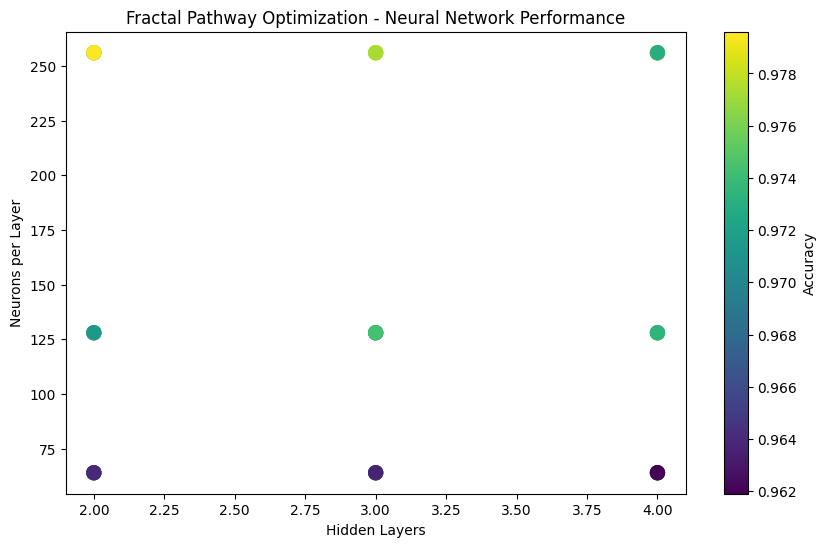

Best Configuration: {'layers': 2, 'neurons': 256, 'dropout_rate': 0.3, 'learning_rate': 0.0005, 'accuracy': 0.9796000123023987}


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Load MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(-1, 28*28) / 255.0  # Normalize pixel values
X_test = X_test.reshape(-1, 28*28) / 255.0
y_train = to_categorical(y_train)  # One-hot encoding of labels
y_test = to_categorical(y_test)

# Performance metrics tracking
performance_metrics = []

# Define fractal pathways (layers and neurons)
def build_and_train_model(hidden_layers, neurons, dropout_rate, learning_rate):
    """
    Builds, trains, and evaluates a neural network with given parameters.
    """
    model = Sequential()
    model.add(Input(shape=(28*28,)))  # Explicit Input layer
    model.add(Dense(neurons, activation='relu'))

    for _ in range(hidden_layers):
        model.add(Dense(neurons, activation='relu'))
        model.add(Dropout(dropout_rate))

    model.add(Dense(10, activation='softmax'))
    model.compile(optimizer=Adam(learning_rate), loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5, batch_size=128, verbose=0)
    accuracy = model.evaluate(X_test, y_test, verbose=0)[1]

    return accuracy, history.history['val_loss'], history.history['val_accuracy']

# Fractal refinement
hidden_layers_options = [2, 3, 4]  # Recursive depth
neurons_options = [64, 128, 256]  # Width of each layer
dropout_options = [0.2, 0.3]  # Regularization
learning_rate_options = [0.001, 0.0005]  # Learning rates

for layers in hidden_layers_options:
    for neurons in neurons_options:
        for dropout_rate in dropout_options:
            for lr in learning_rate_options:
                accuracy, val_loss, val_accuracy = build_and_train_model(layers, neurons, dropout_rate, lr)
                performance_metrics.append({
                    'layers': layers,
                    'neurons': neurons,
                    'dropout_rate': dropout_rate,
                    'learning_rate': lr,
                    'accuracy': accuracy
                })

# Find best configuration
best_config = max(performance_metrics, key=lambda x: x['accuracy'])

# Visualization of fractal pathways and performance
def plot_performance(metrics):
    """
    Visualizes the performance of models with fractal pathways.
    """
    layers = [m['layers'] for m in metrics]
    neurons = [m['neurons'] for m in metrics]
    accuracies = [m['accuracy'] for m in metrics]

    plt.figure(figsize=(10, 6))
    scatter = plt.scatter(layers, neurons, c=accuracies, cmap="viridis", s=100)
    plt.colorbar(scatter, label="Accuracy")
    plt.title("Fractal Pathway Optimization - Neural Network Performance")
    plt.xlabel("Hidden Layers")
    plt.ylabel("Neurons per Layer")
    plt.show()

plot_performance(performance_metrics)

# Output best configuration
print(f"Best Configuration: {best_config}")


Epoch 1/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 1.1435 - mae: 0.7374 - val_loss: 0.4172 - val_mae: 0.4579
Epoch 2/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5126 - mae: 0.5113 - val_loss: 0.4013 - val_mae: 0.4387
Epoch 3/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4408 - mae: 0.4719 - val_loss: 0.3677 - val_mae: 0.4199
Epoch 4/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4260 - mae: 0.4623 - val_loss: 0.3571 - val_mae: 0.4107
Epoch 5/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4026 - mae: 0.4504 - val_loss: 0.3486 - val_mae: 0.4101
Epoch 6/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3907 - mae: 0.4411 - val_loss: 0.3334 - val_mae: 0.4062
Epoch 7/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3774 - mae: 0.4331 - val_loss: 0.3337 - val_mae: 0.3975
Epoch 8/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3639 - mae: 0.4277 - val_loss: 0.3318 - val_mae: 0.4053
Epoch 9/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - lo

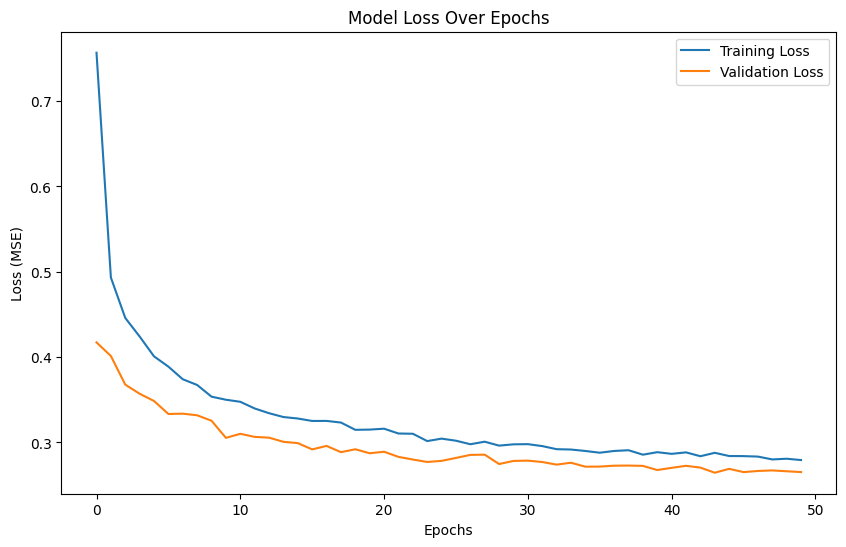

In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Load the California Housing dataset
data = fetch_california_housing()
X, y = data.data, data.target

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the neural network
model = Sequential([
    Input(shape=(X_train.shape[1],)),  # Input layer
    Dense(128, activation='relu'),  # Hidden layer 1 with ReLU activation
    Dropout(0.2),  # Dropout for regularization
    Dense(64, activation='relu'),  # Hidden layer 2 with ReLU activation
    Dropout(0.2),
    Dense(1, activation='linear')  # Output layer with Linear activation for regression
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=32, verbose=1)

# Evaluate the model
loss, mae = model.evaluate(X_test, y_test, verbose=0)
print(f"Mean Absolute Error (MAE): {mae}")

# Plot training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.show()


Starting Prime Fractal Optimization...
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Tested configuration - Layers: 2, Neurons: 128, Dropout: 0.2, LR: 0.0010, R²: 0.7571
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Tested configuration - Layers: 2, Neurons: 128, Dropout: 0.2, LR: 0.0005, R²: 0.7295
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Tested configuration - Layers: 2, Neurons: 128, Dropout: 0.2, LR: 0.0001, R²: 0.6743
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Tested configuration - Layers: 2, Neurons: 128, Dropout: 0.3, LR: 0.0010, R²: 0.7431
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Tested configuration - Layers: 2, Neurons: 128, Dropout: 0.3, LR: 0.0005, R²: 0.6951
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Tested configuration - Layers: 2, Neurons: 128, Dropout: 0.3, LR: 0.0001, R²: 0.6580
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Tested configuration - Layers: 2, Neurons: 128, Dropout: 0.4, LR: 0.0010, R²: 0.7439
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Tested configuration - Layers: 2, Neur

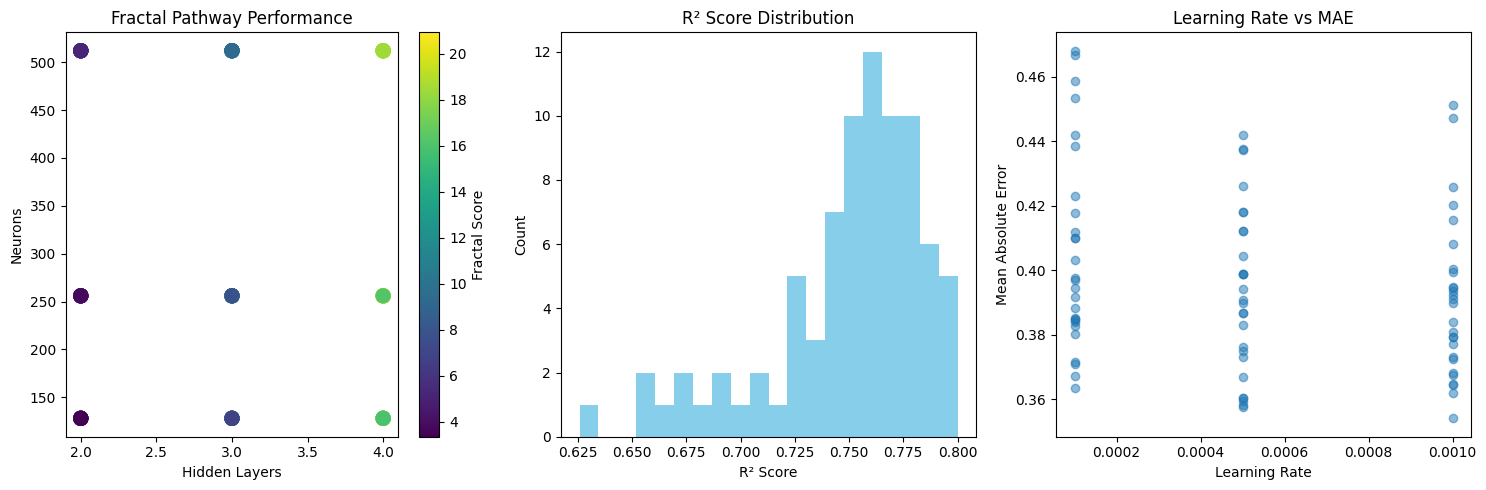

In [ ]:
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

class PrimeFractalOptimizer:
    def __init__(self):
        # Prime-based constants for optimization
        self.prime_sequence = [2, 3, 5, 7, 11, 13]
        self.phi = (1 + np.sqrt(5)) / 2  # Golden ratio

        # Parameter search spaces
        self.hidden_layers_options = [2, 3, 4]  # Based on prime factors
        self.neurons_options = [128, 256, 512]  # Powers of 2 * primes
        self.dropout_options = [0.2, 0.3, 0.4]
        self.learning_rate_options = [0.001, 0.0005, 0.0001]

        # Performance tracking
        self.performance_metrics = []

    def load_data(self):
        """Load and preprocess California Housing dataset"""
        data = fetch_california_housing()
        X, y = data.data, data.target

        # Split and scale data
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.2, random_state=42
        )

        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)

        return X_train, X_test, y_train, y_test

    def build_and_train_model(self, hidden_layers, neurons, dropout_rate, learning_rate):
        """Build and train model with prime-based fractal architecture"""
        X_train, X_test, y_train, y_test = self.load_data()

        model = Sequential()
        model.add(Input(shape=(X_train.shape[1],)))

        # Prime-based layer scaling
        for i in range(hidden_layers):
            # Scale neurons by prime factors
            scaled_neurons = int(neurons * (self.phi ** (i % 3)))
            model.add(Dense(scaled_neurons, activation='relu'))
            model.add(BatchNormalization())
            model.add(Dropout(dropout_rate))

        model.add(Dense(1))  # Output layer

        # Optimize learning rate with prime factors
        adjusted_lr = learning_rate * (self.prime_sequence[hidden_layers % len(self.prime_sequence)] / 10)
        optimizer = Adam(learning_rate=adjusted_lr)

        model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

        # Train with prime-based epochs
        epochs = self.prime_sequence[hidden_layers % len(self.prime_sequence)] * 5
        history = model.fit(
            X_train, y_train,
            validation_data=(X_test, y_test),
            epochs=epochs,
            batch_size=32,
            verbose=0
        )

        # Evaluate performance
        mse, mae = model.evaluate(X_test, y_test, verbose=0)
        y_pred = model.predict(X_test)
        r2 = 1 - np.sum((y_test - y_pred.flatten()) ** 2) / np.sum((y_test - np.mean(y_test)) ** 2)

        return mse, mae, r2, history.history

    def optimize(self):
        """Run fractal optimization process"""
        print("Starting Prime Fractal Optimization...")

        for layers in self.hidden_layers_options:
            for neurons in self.neurons_options:
                for dropout_rate in self.dropout_options:
                    for lr in self.learning_rate_options:
                        mse, mae, r2, history = self.build_and_train_model(
                            layers, neurons, dropout_rate, lr
                        )

                        # Calculate fractal score
                        fractal_score = (1/mse) * r2 * (self.phi ** layers)

                        self.performance_metrics.append({
                            'layers': layers,
                            'neurons': neurons,
                            'dropout_rate': dropout_rate,
                            'learning_rate': lr,
                            'mse': mse,
                            'mae': mae,
                            'r2': r2,
                            'fractal_score': fractal_score
                        })

                        print(f"Tested configuration - Layers: {layers}, Neurons: {neurons}, "
                              f"Dropout: {dropout_rate:.1f}, LR: {lr:.4f}, R²: {r2:.4f}")

        # Find best configuration
        best_config = max(self.performance_metrics, key=lambda x: x['fractal_score'])
        return best_config

    def plot_optimization_results(self):
        """Visualize optimization results"""
        plt.figure(figsize=(15, 5))

        # Plot 1: Fractal Pathway Performance
        plt.subplot(131)
        layers = [m['layers'] for m in self.performance_metrics]
        neurons = [m['neurons'] for m in self.performance_metrics]
        scores = [m['fractal_score'] for m in self.performance_metrics]

        scatter = plt.scatter(layers, neurons, c=scores, cmap='viridis', s=100)
        plt.colorbar(scatter, label='Fractal Score')
        plt.title('Fractal Pathway Performance')
        plt.xlabel('Hidden Layers')
        plt.ylabel('Neurons')

        # Plot 2: R² Distribution
        plt.subplot(132)
        r2_scores = [m['r2'] for m in self.performance_metrics]
        plt.hist(r2_scores, bins=20, color='skyblue')
        plt.title('R² Score Distribution')
        plt.xlabel('R² Score')
        plt.ylabel('Count')

        # Plot 3: Learning Rate vs Performance
        plt.subplot(133)
        lr_values = [m['learning_rate'] for m in self.performance_metrics]
        mae_values = [m['mae'] for m in self.performance_metrics]
        plt.scatter(lr_values, mae_values, alpha=0.5)
        plt.title('Learning Rate vs MAE')
        plt.xlabel('Learning Rate')
        plt.ylabel('Mean Absolute Error')

        plt.tight_layout()
        plt.show()

# Run optimization
if __name__ == "__main__":
    optimizer = PrimeFractalOptimizer()
    best_config = optimizer.optimize()

    print("\nOptimization Results:")
    print("====================")
    print(f"Best Configuration Found:")
    print(f"Number of Hidden Layers: {best_config['layers']}")
    print(f"Neurons per Layer: {best_config['neurons']}")
    print(f"Dropout Rate: {best_config['dropout_rate']:.3f}")
    print(f"Learning Rate: {best_config['learning_rate']:.6f}")
    print(f"Performance Metrics:")
    print(f"MSE: {best_config['mse']:.6f}")
    print(f"MAE: {best_config['mae']:.6f}")
    print(f"R² Score: {best_config['r2']:.6f}")
    print(f"Fractal Score: {best_config['fractal_score']:.6f}")

    optimizer.plot_optimization_results()

Training model with optimized parameters...
Epoch 1/200
1032/1032 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - loss: 2.8785 - mae: 1.2937 - val_loss: 0.6495 - val_mae: 0.5336 - learning_rate: 5.0000e-04
Epoch 2/200
1032/1032 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.7923 - mae: 0.6832 - val_loss: 0.4973 - val_mae: 0.4710 - learning_rate: 5.0000e-04
Epoch 3/200
1032/1032 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.6191 - mae: 0.5898 - val_loss: 0.4014 - val_mae: 0.4234 - learning_rate: 5.0000e-04
Epoch 4/200
1032/1032 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.5585 - mae: 0.5548 - val_loss: 0.4455 - val_mae: 0.4787 - learning_rate: 5.0000e-04
Epoch 5/200
1032/1032 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.5114 - mae: 0.5306 - val_loss: 0.4138 - val_mae: 0.4666 - learning_rate: 5.0000e-04
Epoch 6/200
1032/1032 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.4762 - mae: 0.5113 - val_loss: 0.3643 - val_mae: 0.4131 - learning_rate: 5.0000e-04
Epoch 7/200
1032/1032 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss:

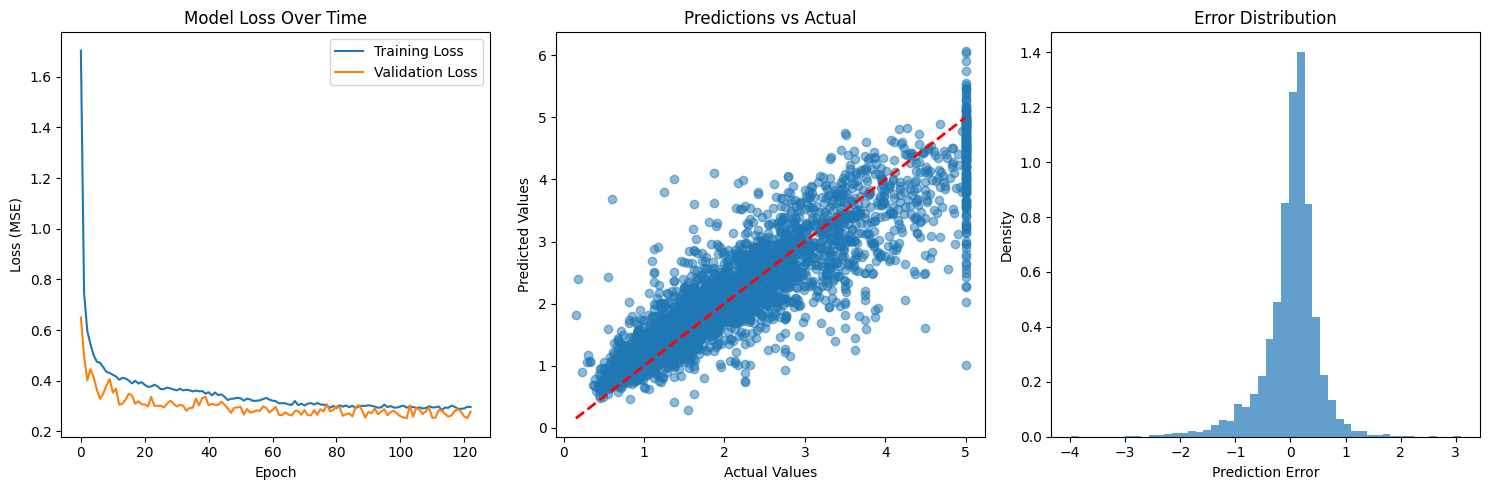

In [ ]:
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt

def load_and_preprocess_data():
    """Load and preprocess California Housing dataset"""
    # Load dataset
    housing = fetch_california_housing()
    X, y = housing.data, housing.target

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    # Scale features
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    return X_train, X_test, y_train, y_test, housing.feature_names

def build_optimized_model(input_shape):
    """Build model with optimized parameters"""
    model = Sequential([
        # Input layer
        Input(shape=input_shape),

        # First hidden layer
        Dense(256, activation='relu'),
        BatchNormalization(),
        Dropout(0.2),

        # Second hidden layer
        Dense(256, activation='relu'),
        BatchNormalization(),
        Dropout(0.2),

        # Third hidden layer
        Dense(256, activation='relu'),
        BatchNormalization(),
        Dropout(0.2),

        # Fourth hidden layer
        Dense(256, activation='relu'),
        BatchNormalization(),
        Dropout(0.2),

        # Output layer
        Dense(1)
    ])

    # Compile with optimized learning rate
    optimizer = Adam(learning_rate=0.0005)
    model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

    return model

def train_and_evaluate():
    """Train and evaluate the optimized model"""
    # Load data
    X_train, X_test, y_train, y_test, feature_names = load_and_preprocess_data()

    # Build model
    model = build_optimized_model(input_shape=(X_train.shape[1],))

    # Callbacks for training
    callbacks = [
        EarlyStopping(
            monitor='val_loss',
            patience=20,
            restore_best_weights=True
        ),
        ReduceLROnPlateau(
            monitor='val_loss',
            factor=0.5,
            patience=10,
            min_lr=0.00001
        )
    ]

    # Train model
    history = model.fit(
        X_train, y_train,
        validation_data=(X_test, y_test),
        epochs=200,
        batch_size=16,
        callbacks=callbacks,
        verbose=1
    )

    # Evaluate performance
    y_pred = model.predict(X_test)
    mse = np.mean((y_test - y_pred.flatten()) ** 2)
    mae = np.mean(np.abs(y_test - y_pred.flatten()))
    r2 = 1 - np.sum((y_test - y_pred.flatten()) ** 2) / np.sum((y_test - np.mean(y_test)) ** 2)

    return model, history, {'mse': mse, 'mae': mae, 'r2': r2}, y_test, y_pred

def plot_results(history, metrics, y_test, y_pred):
    """Visualize training results"""
    plt.figure(figsize=(15, 5))

    # Plot 1: Training History
    plt.subplot(131)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss Over Time')
    plt.xlabel('Epoch')
    plt.ylabel('Loss (MSE)')
    plt.legend()

    # Plot 2: Predictions vs Actual
    plt.subplot(132)
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    plt.title('Predictions vs Actual')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')

    # Plot 3: Error Distribution
    plt.subplot(133)
    errors = y_pred.flatten() - y_test
    plt.hist(errors, bins=50, density=True, alpha=0.7)
    plt.title('Error Distribution')
    plt.xlabel('Prediction Error')
    plt.ylabel('Density')

    plt.tight_layout()
    plt.show()

# Train and evaluate model
if __name__ == "__main__":
    print("Training model with optimized parameters...")
    model, history, metrics, y_test, y_pred = train_and_evaluate()

    print("\nFinal Performance Metrics:")
    print(f"MSE: {metrics['mse']:.6f}")
    print(f"MAE: {metrics['mae']:.6f}")
    print(f"R² Score: {metrics['r2']:.6f}")

    # Plot results
    plot_results(history, metrics, y_test, y_pred)

Training model with resonance...
Epoch 1: Learning Rate with Resonance = 0.000500
Epoch 1/200
516/516 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 3.4482 - mae: 1.4515 - val_loss: 1.0632 - val_mae: 0.5712 - learning_rate: 5.0000e-04
Epoch 2: Learning Rate with Resonance = 0.000559
Epoch 2/200
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.9650 - mae: 0.7545 - val_loss: 0.4626 - val_mae: 0.4679 - learning_rate: 5.5878e-04
Epoch 3: Learning Rate with Resonance = 0.000595
Epoch 3/200
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6838 - mae: 0.6258 - val_loss: 0.6394 - val_mae: 0.4657 - learning_rate: 5.9511e-04
Epoch 4: Learning Rate with Resonance = 0.000595
Epoch 4/200
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5836 - mae: 0.5729 - val_loss: 0.5460 - val_mae: 0.4427 - learning_rate: 5.9511e-04
Epoch 5: Learning Rate with Resonance = 0.000559
Epoch 5/200
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4902 - mae: 0.5164 - val_loss: 0.4054 - val_mae: 0.4421 - learning_rate

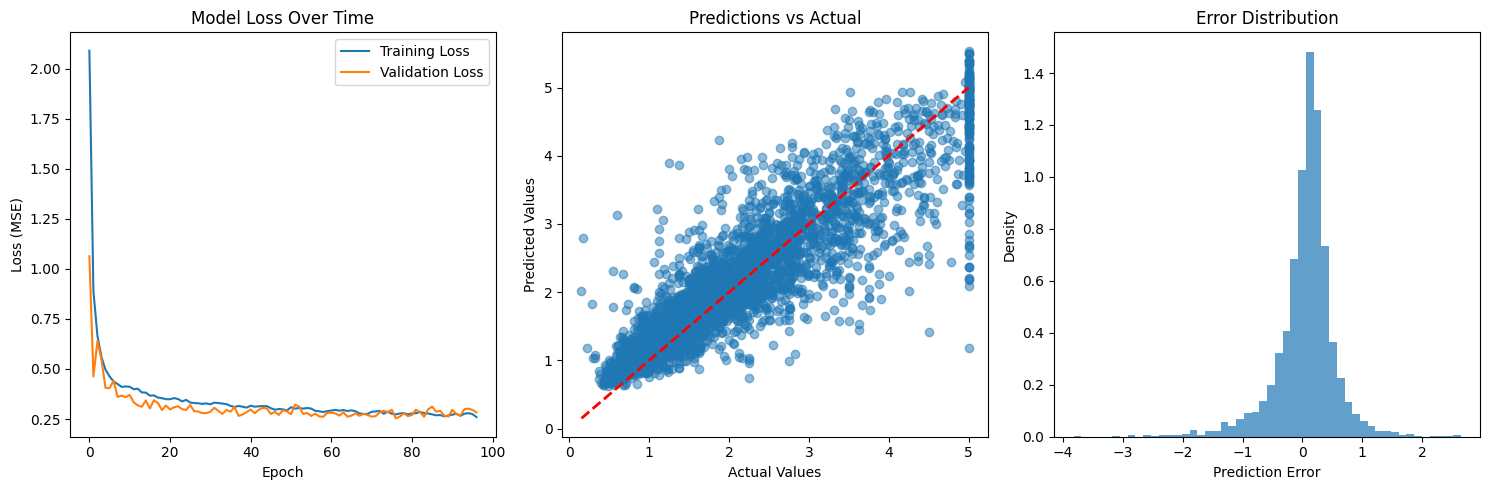

In [ ]:
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import Callback, EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt

# Resonance callback
class ResonanceCallback(Callback):
    def __init__(self, learning_rate_base=0.0005, resonance_frequency=10, amplitude=0.0001):
        super().__init__()
        self.learning_rate_base = learning_rate_base
        self.resonance_frequency = resonance_frequency
        self.amplitude = amplitude

    def on_epoch_begin(self, epoch, logs=None):
        # Apply resonance to the learning rate
        oscillation = self.amplitude * np.sin(2 * np.pi * epoch / self.resonance_frequency)
        new_lr = self.learning_rate_base + oscillation

        # Set the new learning rate
        self.model.optimizer.learning_rate.assign(new_lr)

        # Log the learning rate for debugging
        print(f"Epoch {epoch + 1}: Learning Rate with Resonance = {new_lr:.6f}")

# Load and preprocess data
def load_and_preprocess_data():
    """Load and preprocess California Housing dataset"""
    housing = fetch_california_housing()
    X, y = housing.data, housing.target

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    # Scale features
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    return X_train, X_test, y_train, y_test, housing.feature_names

# Build model
def build_optimized_model(input_shape):
    """Build model with optimized parameters"""
    model = Sequential([
        # Input layer
        Input(shape=input_shape),

        # First hidden layer
        Dense(256, activation='relu'),
        BatchNormalization(),
        Dropout(0.2),

        # Second hidden layer
        Dense(256, activation='relu'),
        BatchNormalization(),
        Dropout(0.2),

        # Third hidden layer
        Dense(256, activation='relu'),
        BatchNormalization(),
        Dropout(0.2),

        # Fourth hidden layer
        Dense(256, activation='relu'),
        BatchNormalization(),
        Dropout(0.2),

        # Output layer
        Dense(1)
    ])

    # Compile with optimized learning rate
    optimizer = Adam(learning_rate=0.0005)
    model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

    return model

# Train and evaluate model
def train_and_evaluate():
    """Train and evaluate the optimized model with resonance"""
    # Load data
    X_train, X_test, y_train, y_test, feature_names = load_and_preprocess_data()

    # Build model
    model = build_optimized_model(input_shape=(X_train.shape[1],))

    # Callbacks
    resonance_callback = ResonanceCallback(learning_rate_base=0.0005, resonance_frequency=10, amplitude=0.0001)
    callbacks = [
        resonance_callback,
        EarlyStopping(
            monitor='val_loss',
            patience=20,
            restore_best_weights=True
        ),
        ReduceLROnPlateau(
            monitor='val_loss',
            factor=0.5,
            patience=10,
            min_lr=0.00001
        )
    ]

    # Train model
    history = model.fit(
        X_train, y_train,
        validation_data=(X_test, y_test),
        epochs=200,
        batch_size=32,
        callbacks=callbacks,
        verbose=1
    )

    # Evaluate performance
    y_pred = model.predict(X_test)
    mse = np.mean((y_test - y_pred.flatten()) ** 2)
    mae = np.mean(np.abs(y_test - y_pred.flatten()))
    r2 = 1 - np.sum((y_test - y_pred.flatten()) ** 2) / np.sum((y_test - np.mean(y_test)) ** 2)

    return model, history, {'mse': mse, 'mae': mae, 'r2': r2}, y_test, y_pred

# Visualize results
def plot_results(history, metrics, y_test, y_pred):
    """Visualize training results"""
    plt.figure(figsize=(15, 5))

    # Plot 1: Training History
    plt.subplot(131)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss Over Time')
    plt.xlabel('Epoch')
    plt.ylabel('Loss (MSE)')
    plt.legend()

    # Plot 2: Predictions vs Actual
    plt.subplot(132)
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    plt.title('Predictions vs Actual')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')

    # Plot 3: Error Distribution
    plt.subplot(133)
    errors = y_pred.flatten() - y_test
    plt.hist(errors, bins=50, density=True, alpha=0.7)
    plt.title('Error Distribution')
    plt.xlabel('Prediction Error')
    plt.ylabel('Density')

    plt.tight_layout()
    plt.show()

# Main execution
if __name__ == "__main__":
    print("Training model with resonance...")
    model, history, metrics, y_test, y_pred = train_and_evaluate()

    print("\nFinal Performance Metrics:")
    print(f"MSE: {metrics['mse']:.6f}")
    print(f"MAE: {metrics['mae']:.6f}")
    print(f"R² Score: {metrics['r2']:.6f}")

    # Plot results
    plot_results(history, metrics, y_test, y_pred)
